In [1]:
# import librosa
import sys
sys.path.append('/Users/angelinazhai/ffmpeg') #https://stackoverflow.com/questions/57350259/filenotfounderror-errno-2-no-such-file-or-directory-ffprobe-ffprobe

# import scipy
from scipy import signal
import matplotlib.pyplot as plt
import os
import numpy as np

#import pydub for reading audio files
# import pydub
# from pydub import AudioSegment
# from ffprobe import FFProbe #needed for pydub 

import librosa
import librosa.display



In [2]:
#relocate to folder with recordings
ROOT = '/Users/angelinazhai/Desktop/Github-Repositories/language-dsp'
ORIGINAL_REC = 'recordings/original'

In [13]:
#processing every single file in the folder
processed_info = {}
for root, dirs, files in os.walk(os.path.join(ROOT, ORIGINAL_REC)):
    for file in files:
        if file.endswith('.m4a'):
            y, sr = librosa.load(os.path.join(ROOT, ORIGINAL_REC, file))
            processed_info[file] = {}
            processed_info[file]['SR'] = sr
            processed_info[file]['Time_Domain'] = y
            D = librosa.stft(y)
            processed_info[file]['Freq_Domain'] = D
            S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
            processed_info[file]['db'] = S_db

print(processed_info)

/Users/angelinazhai/.pyenv/versions/3.10.0/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


{'Ang English.m4a': {'SR': 22050, 'Time_Domain': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -6.7242377e-07,  6.8025139e-07,  0.0000000e+00], dtype=float32), 'Freq_Domain': array([[-1.3157284e-06+0.0000000e+00j, -2.0233520e-04+0.0000000e+00j,
        -7.2095561e-01+0.0000000e+00j, ...,
        -9.0138838e-02+0.0000000e+00j, -4.5361249e-03+0.0000000e+00j,
        -9.9512346e-02+0.0000000e+00j],
       [-1.1835094e-06-5.2468630e-07j, -1.2565940e-05-1.9779569e-04j,
        -4.2382607e-01-5.5457878e-01j, ...,
         2.1467390e-02+2.9224098e-01j, -3.8361397e-02-2.1253861e-01j,
         8.0482170e-02+1.0995337e-01j],
       [-8.2202013e-07-9.1850632e-07j,  1.8471840e-04-2.5444962e-05j,
         1.7317258e-01-6.1093277e-01j, ...,
        -8.8475317e-02-6.2047601e-01j, -1.4451627e-01+5.0252807e-01j,
         1.1457287e-01-1.3625580e-01j],
       ...,
       [-1.9609207e-10+2.3389398e-11j,  2.1592279e-09-2.7455410e-10j,
        -2.1170687e-08-3.7183074e-09j, ...,
      

In [12]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()
plt.show()
processed_info['Ree Eng.m4a']['Freq_Domain']

array([[-6.9987855e-06+0.00000000e+00j, -5.7704787e-04+0.00000000e+00j,
         4.5725766e-01+0.00000000e+00j, ...,
         3.6071774e-02+0.00000000e+00j, -2.3769058e-02+0.00000000e+00j,
         4.8439503e-02+0.00000000e+00j],
       [-6.5216868e-06-2.46768354e-06j, -1.3076197e-04-4.91960905e-04j,
         3.9145032e-01+2.33251780e-01j, ...,
        -1.2828460e-02-1.24639392e-01j,  6.9628984e-02+6.79009855e-02j,
        -6.5461732e-02+8.48506205e-03j],
       [-5.1659486e-06-4.56822227e-06j,  2.9855379e-04-1.55156406e-04j,
         2.0453095e-01+3.91696304e-01j, ...,
         5.4374378e-02+1.81370810e-01j, -9.0492452e-03-1.25641108e-01j,
         4.4900995e-02+1.67616480e-03j],
       ...,
       [ 2.4546820e-10+2.40369304e-11j,  6.4327689e-11+1.67369585e-09j,
        -1.8037914e-08+6.46509264e-08j, ...,
        -1.8901669e-07+6.31924824e-09j, -4.5563991e-07+8.96415543e-07j,
         8.1764729e-06-1.17970585e-05j],
       [ 2.3627414e-10+1.07686872e-11j, -1.0340614e-09+5.07039966e-1

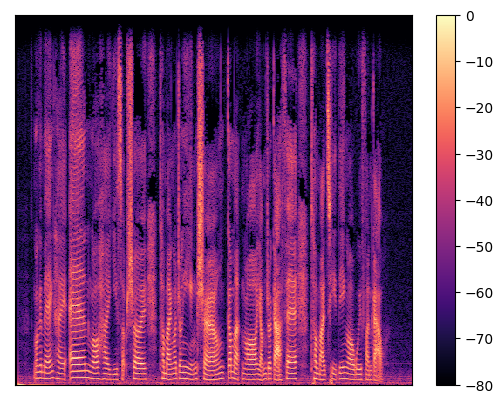

In [15]:
plt.figure()
librosa.display.specshow(processed_info['Anne Canto.m4a']['db'])
plt.colorbar()
plt.show()